In [105]:
pip install statsmodels --user

     |████████████████████████████████| 9.9 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 1.8 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Flatten, Rescaling, RandomFlip, RandomRotation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from tensorflow.keras import layers, models, Model
from sklearn.metrics import r2_score

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ey444h0h because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [5]:
url = './preprocess_image_resize'

In [6]:
generator = ImageDataGenerator(
    rescale= 1. / 255
)

In [7]:
url2 = './2012_2019_PlatteRiverWeir_features_merged_all.csv'
df = pd.read_csv(url2)
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,StateLineWeir_20120609_Farrell_001.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,StateLineWeir_20120609_Farrell_002.jpg,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,StateLineWeir_20120609_Farrell_003.jpg,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,StateLineWeir_20120609_Farrell_004.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,StateLineWeir_20120609_Farrell_005.jpg,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df[' Filename'] = './preprocess_image_resize/' + df[' Filename'].astype(str)

In [9]:
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-06-09 13:15:00,2012-06-09T13:10:29,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-06-09 13:45:00,2012-06-09T13:44:01,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012-06-09 14:45:00,2012-06-09T14:44:30,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2012-06-09 15:45:00,2012-06-09T15:44:59,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dfTrain = df

In [11]:
df['Year'] = df[' CaptureTime'].str.slice(0, 4)

In [12]:
df.head()

,SensorTime,CaptureTime,Filename,Agency,SiteNumber,TimeZone,Stage,Discharge,CalcTimestamp,width,...,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma,Year
0,2012-06-09 13:15:00,2012-06-09T13:09:07,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:28,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
1,2012-06-09 13:15:00,2012-06-09T13:10:29,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.99,916.0,2020-03-11T16:58:33,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
2,2012-06-09 13:45:00,2012-06-09T13:44:01,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.96,873.0,2020-03-11T16:58:40,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
3,2012-06-09 14:45:00,2012-06-09T14:44:30,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:47,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012
4,2012-06-09 15:45:00,2012-06-09T15:44:59,./preprocess_image_resize/StateLineWeir_201206...,USGS,6674500,MDT,2.94,846.0,2020-03-11T16:58:55,4288,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012


In [13]:
dfTrain = df[df['Year'] != '2015']

In [14]:
dfTrain = dfTrain[dfTrain['Year'] != '2016']

In [15]:
dfTrain = dfTrain[dfTrain['Year'] != '2017']

In [16]:
dfTest = df[df['Year'] <= '2017']

In [17]:
dfTest = dfTrain[dfTrain['Year'] >= '2015']

In [16]:
train = generator.flow_from_dataframe(
    dataframe=dfTrain,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 23462 validated image filenames.


In [18]:
test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True
)

Found 13248 validated image filenames.


In [18]:
def adapt_efficient_net() -> Model:
    inputs = layers.Input(
        shape=(224, 224, 3)
    )  # input shapes of the images should always be 224x224x3 with EfficientNetB0
    # use the downloaded and converted newest EfficientNet wheights
    model = tf.keras.applications.resnet.ResNet101(include_top=False, input_tensor=inputs)

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)
    top_dropout_rate = 0.4
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(1, activation="linear")(x)

    # Compile
    model = keras.Model(inputs, outputs)
    
    return model

In [19]:
model = adapt_efficient_net()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 88cf7a10940856eca736dc7b7e228a21 so we will re-download the data.
171446536/171446536 [==============================] - 72s 0us/step


In [20]:
def compile_model(model):
    sgd = SGD(learning_rate = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
    model.compile(optimizer = 'adam', loss='mse', metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError()], run_eagerly = True)
# , mae, rsmse, r2, stand_error

In [21]:
def fit_model(model, train_data, validation_data):
    training_history = model.fit(train_data, batch_size=64, epochs=15, validation_data=validation_data)
    return training_history

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=2)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.5, min_lr=0.00001)


In [23]:
def fit_model_w_early_stopping(model, train_data, validation_data):
    training_history = model.fit(train_data, 
                                 batch_size=64, 
                                 epochs=10, 
                                 validation_data=validation_data,
                                 callbacks = [earlystop])
    return training_history

In [24]:
compile_model(model)

In [25]:
training_history = fit_model(model, train, test)

Epoch 1/15
2933/2933 [==============================] - 2354s 785ms/step - loss: 1.1039 - mean_absolute_error: 0.6918 - root_mean_squared_error: 1.0507 - mean_absolute_percentage_error: 491156.5312 - val_loss: 162.2333 - val_mean_absolute_error: 9.3617 - val_root_mean_squared_error: 12.7371 - val_mean_absolute_percentage_error: 1640731.0000
Epoch 2/15
2933/2933 [==============================] - 2355s 803ms/step - loss: 0.5977 - mean_absolute_error: 0.5348 - root_mean_squared_error: 0.7731 - mean_absolute_percentage_error: 316339.5625 - val_loss: 4.5373 - val_mean_absolute_error: 1.2842 - val_root_mean_squared_error: 2.1301 - val_mean_absolute_percentage_error: 517955.1562
Epoch 3/15
2933/2933 [==============================] - 2361s 805ms/step - loss: 0.4529 - mean_absolute_error: 0.4632 - root_mean_squared_error: 0.6730 - mean_absolute_percentage_error: 417495.4688 - val_loss: 38.2948 - val_mean_absolute_error: 1.2743 - val_root_mean_squared_error: 6.1883 - val_mean_absolute_percenta

In [26]:
model.evaluate(test, batch_size=64)

1656/1656 [==============================] - 354s 214ms/step - loss: 0.6776 - mean_absolute_error: 0.8212 - root_mean_squared_error: 0.8232 - mean_absolute_percentage_error: 487182.7500


[0.6776460409164429, 0.8212382793426514, 0.8231925964355469, 487182.75]

In [27]:
training_history.history

{'loss': [1.1038681268692017,
  0.5976988077163696,
  0.45289310812950134,
  0.4143868386745453,
  0.3026699423789978,
  0.2051122933626175,
  0.14166119694709778,
  0.13253986835479736,
  0.131673663854599,
  0.10375095903873444,
  0.07777828723192215,
  0.06449930369853973,
  0.061194613575935364,
  0.06164814531803131,
  0.059457991272211075],
 'mean_absolute_error': [0.691780686378479,
  0.5348121523857117,
  0.46319904923439026,
  0.44970953464508057,
  0.39077240228652954,
  0.3387065529823303,
  0.2913758456707001,
  0.27749475836753845,
  0.27790534496307373,
  0.2443697154521942,
  0.21764898300170898,
  0.19852568209171295,
  0.19432219862937927,
  0.19656367599964142,
  0.19277749955654144],
 'root_mean_squared_error': [1.0506513118743896,
  0.7731098532676697,
  0.6729733347892761,
  0.6437288522720337,
  0.550154447555542,
  0.4528932571411133,
  0.3763790428638458,
  0.36406025290489197,
  0.36286866664886475,
  0.32210394740104675,
  0.2788875997066498,
  0.2539671361446

In [28]:
import json

# as requested in comment
exDict = {'exDict': training_history.history}

with open('file2Stage.txt', 'w') as file:
     file.write(json.dumps(exDict))

In [29]:
fig, ax = plt.subplots()
X = np.linspace(0, 1, 15)
Y1 = training_history.history['loss']
Y2 = training_history.history['val_loss']
ax.plot(X, Y1, X, Y2)


In [30]:
predictions = model.predict(test)

1656/1656 [==============================] - 334s 202ms/step


In [31]:
predictions

array([[2.336472 ],
       [2.6419964],
       [1.5491824],
       ...,
       [1.384488 ],
       [1.4068273],
       [1.0752591]], dtype=float32)

In [32]:
test

In [33]:
len(predictions)

13248

In [34]:
np.savetxt("predictions_resnetStage.csv", predictions, delimiter=",")

In [35]:
weights = model.get_weights()  # Recupera el estado del modelo.
model.set_weights(weights) #set weigths

In [57]:
weights

[array([[[[ 1.53133497e-01,  3.56667303e-02,  1.49183407e-01, ...,
            1.05377384e-01, -9.43217352e-02, -3.74582447e-02],
          [ 1.99750632e-01,  3.52988802e-02,  1.87972426e-01, ...,
            6.45461231e-02,  6.69201612e-02,  2.58033071e-02],
          [ 1.88460365e-01,  1.96212798e-01,  1.67794183e-01, ...,
            1.64617181e-01,  6.97179660e-02, -2.56638024e-02]],
 
         [[ 1.55250654e-01, -5.33416867e-02,  8.47170874e-02, ...,
            2.26785801e-02, -6.64644688e-02, -8.46353825e-04],
          [ 1.31164983e-01, -6.78347349e-02,  1.02973022e-01, ...,
           -6.14910983e-02, -2.44812518e-02,  3.95947061e-02],
          [ 1.16055124e-01,  9.17256773e-02,  1.00896090e-01, ...,
            3.32895666e-02,  1.83685143e-02, -1.64104253e-02]],
 
         [[ 6.12849519e-02, -2.06988584e-02,  1.21437326e-01, ...,
           -3.20077338e-03, -5.12205772e-02, -2.38961633e-02],
          [ 3.52824107e-03, -5.58324382e-02,  1.36183232e-01, ...,
           -8.237

In [36]:
np.savetxt('weight_resnetStage.csv' , weights , fmt='%s', delimiter=',')

/.local/lib/python3.8/site-packages/numpy/lib/npyio.py:1533: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


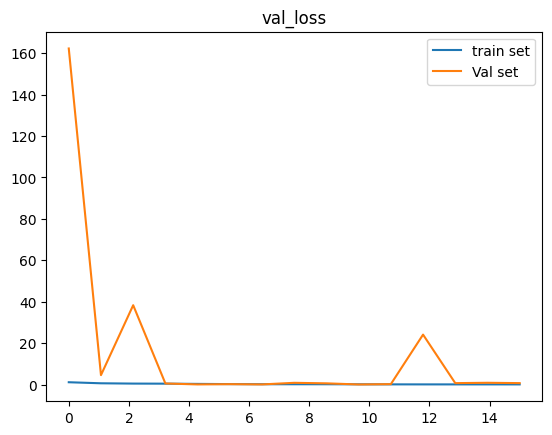

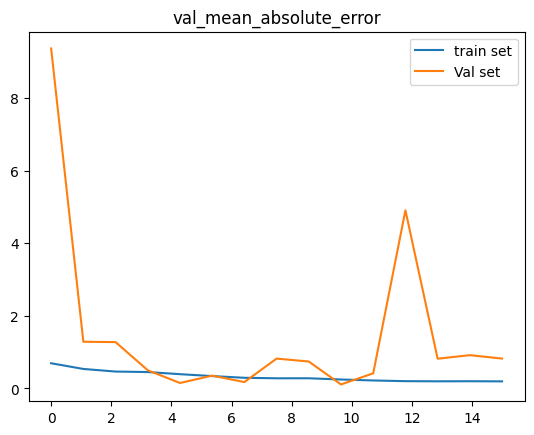

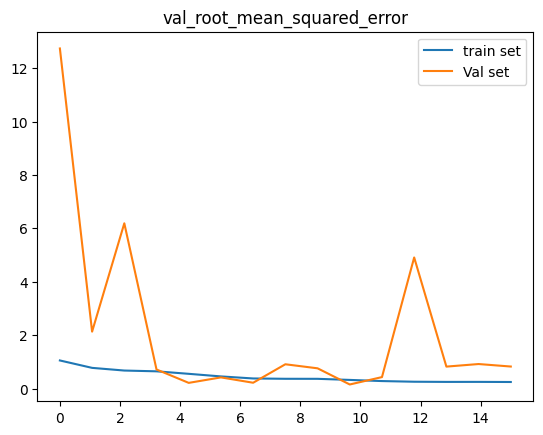

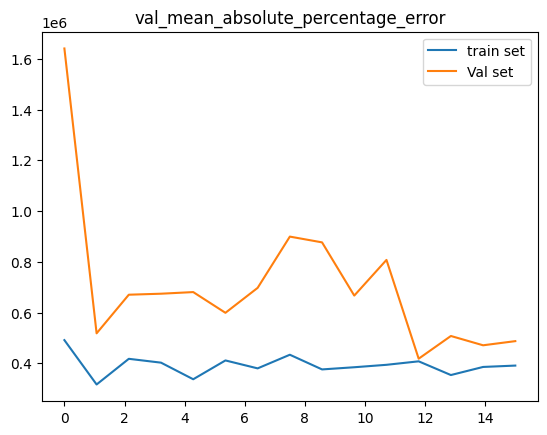

In [83]:
grf = list(training_history.history.keys())

ls1 = grf[4:]
ls2 = grf[:4]
for i in range(4):
    fig, ax = plt.subplots()
    X = np.linspace(0, 15, 15)
    Y1 = training_history.history[ls2[i]]
    Y2 = training_history.history[ls1[i]]
    ax.plot(X, Y1, X, Y2)
    ax.legend(["train set", "Val set"])
    ax.set_title(ls1[i])
    plt.show()

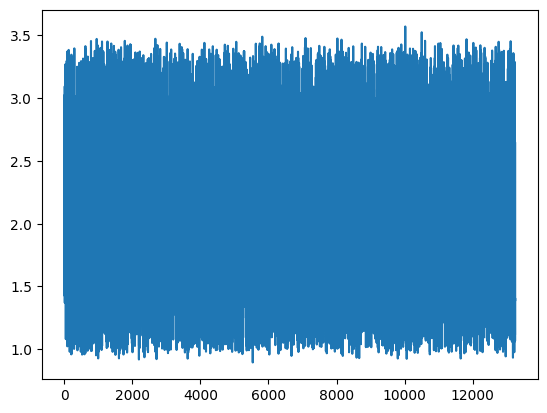

In [38]:
fig, ax = plt.subplots()
ax.plot(predictions)
fig

In [39]:
test?

In [40]:
y = test

In [41]:
Y_Real = test[0][1]
for i in range(1,len(test),1):
    Y_Real = np.concatenate((Y_Real, test[i][1]))

In [42]:
len(Y_Real)

13248

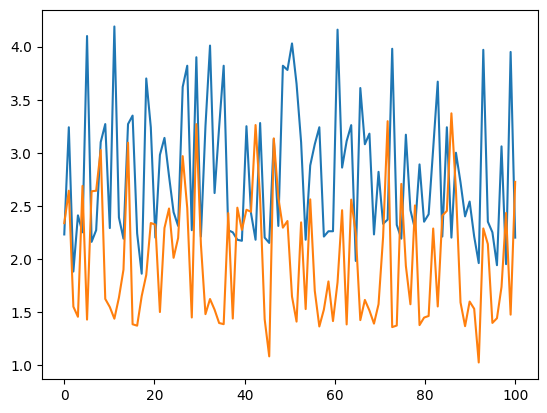

In [43]:
fig, ax = plt.subplots()
X = np.linspace(0, 100, 100)
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y_Real[:100], X, predictions[:100])
fig

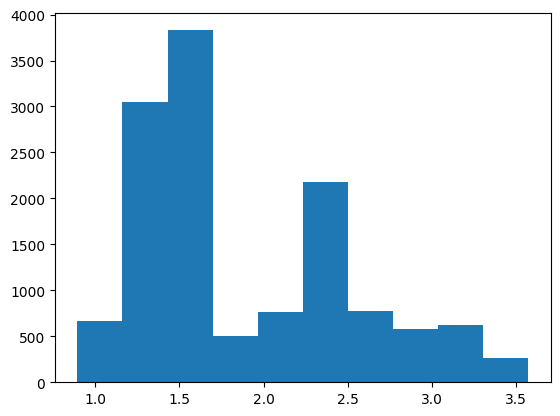

In [44]:
fig, ax = plt.subplots()
ax.hist(predictions)
fig

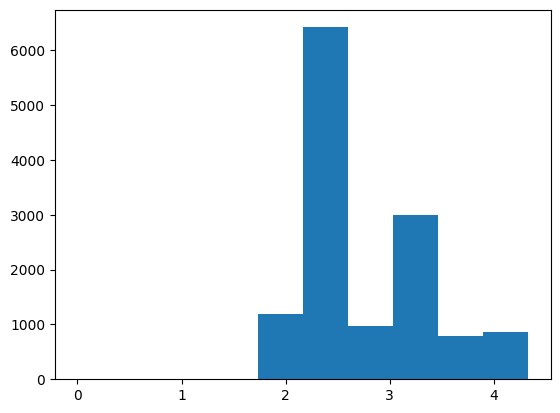

In [45]:
fig, ax = plt.subplots()
ax.hist(Y_Real)
fig

In [19]:
test = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename',
    y_col=' Stage',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True,
    shuffle=False
)

Found 13248 validated image filenames.


In [47]:
predictions = model.predict(test)

1656/1656 [==============================] - 397s 231ms/step


In [20]:
Y_Real = test[0][1]
for i in range(1,len(test),1):
    Y_Real = np.concatenate((Y_Real, test[i][1]))

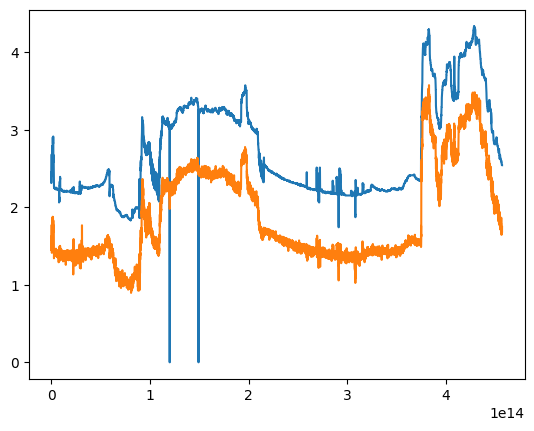

In [56]:
fig, ax = plt.subplots()
X = np.linspace(0, 456789876543456, len(Y_Real))
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y_Real, X, predictions)
fig

In [50]:
np.savetxt("predictions_resnetStage2.csv", predictions, delimiter=",")

In [54]:
np.savetxt("real_resnetStage2.csv", Y_Real, delimiter=",")

In [21]:
testx = generator.flow_from_dataframe(
    dataframe=dfTest,
    x_col=' Filename',
    y_col=' Discharge',
    target_size=(224, 224),
    batch_size=8, 
    class_mode='raw',
    validate_filenames=True,
    shuffle=False
)

Found 13248 validated image filenames.


In [22]:
Y_Realx = testx[0][1]
for i in range(1,len(testx),1):
    Y_Realx = np.concatenate((Y_Realx, testx[i][1]))

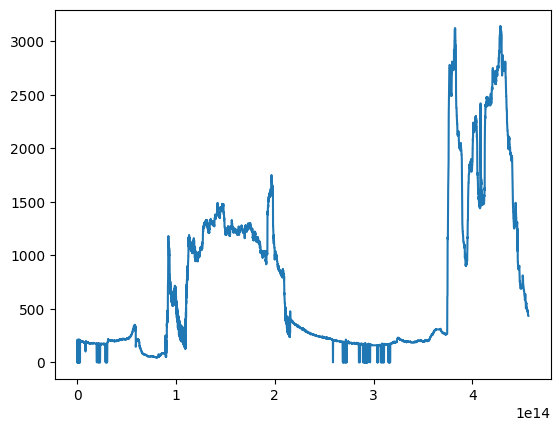

In [23]:
fig, ax = plt.subplots()
X = np.linspace(0, 456789876543456, len(Y_Real))
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y_Realx)
fig

In [1]:
from sklearn.ensemble import RandomForestRegressor

In [2]:
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import mse, rmse, meanabs, stde

In [28]:
import csv

with open('predictions_resnetStage2.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
url22 = './predictions_resnetStage2.csv'
df22 = pd.read_csv(url22, )
df22.head()

,pred
0,1.617409
1,1.503759
2,1.467062
3,1.489804
4,1.473783


In [35]:
preds = df22[['pred']]
preds = preds.to_numpy()
xtrainx = dfTrain[[' Stage']].to_numpy()
ytrainy = dfTrain[[' Discharge']].to_numpy()
ytrainy

array([[916.],
       [916.],
       [873.],
       ...,
       [434.],
       [434.],
       [434.]])

In [36]:
rdm = RandomForestRegressor(n_estimators=20, random_state=0)
rdm.fit(xtrainx, ytrainy)

y_rdm_test_pred = pd.DataFrame(rdm.predict(preds))
ap = {"Test":{
        "MAE": meanabs(y_rdm_test_pred, Y_Realx)[0],
        "MSE": mse(y_rdm_test_pred, Y_Realx)[0],
        "RMSE": rmse(y_rdm_test_pred, Y_Realx)[0],
        "R^2": r2_score(Y_Realx, y_rdm_test_pred),
        "Standard Error": stde(y_rdm_test_pred, Y_Realx, ddof = 52)[0],
        "Y test": Y_Realx,
        "Y test predicted": y_rdm_test_pred}}

<ipython-input-36-2738e5787df3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rdm.fit(xtrainx, ytrainy)


In [37]:
ap

{'Test': {'MAE': 210.05702914774716,
  'MSE': 169948.70985035232,
  'RMSE': 412.2483594271205,
  'R^2': 0.20144798370452,
  'Standard Error': 355.4160630588665,
  'Y test': array([  0.,   0.,   0., ..., 434., 434., 434.]),
  'Y test predicted':                0
  0      21.700000
  1      11.750000
  2      10.800000
  3      11.750000
  4      10.850000
  ...          ...
  13243  35.492833
  13244  37.690833
  13245  29.775000
  13246  27.500000
  13247  25.429167
  
  [13248 rows x 1 columns]}}

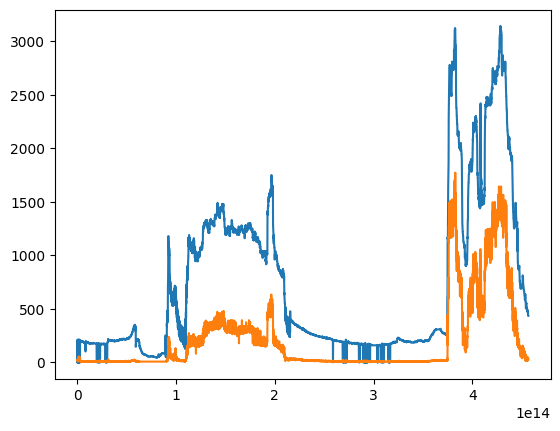

In [38]:
fig, ax = plt.subplots()
X = np.linspace(0, 456789876543456, len(Y_Real))
Y1, Y2 = np.sin(X), np.cos(X)
ax.plot(X, Y_Realx, X, y_rdm_test_pred)
fig